In [1]:
import sys
sys.path.append('../')

from activation import *
from loss import *
from linear import * 
from encapsulage import *
from utils import *
from convolution import *

import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import seaborn as sns


In [2]:

# Charger les données MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalisation
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
X_train = X_train.reshape(-1, 28, 28)  
X_test = X_test.reshape(-1, 28, 28) 
X_train = X_train[:300]
y_train = y_train[:300]
X_test = X_test[:30]
y_test = y_test[:30]

# One-hot encoding des labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# modèle
net = Sequentiel([])
net.add_module(Conv1D(_k_size=3, _chan_out=32, _chan_in=28))  # chan_in=28, chan_out=32, k_size=3

# calcul des dimensions après Conv1D
conv1d_output_length = (28 - 3) // 1 + 1  # 26
conv1d_output_channels = 32

net.add_module(MaxPool1D(2, 2)) 

# calcul des dimensions après maxpool1D
maxpool1d_output_length = (conv1d_output_length - 2) // 2 + 1  # 13

net.add_module(Flatten())

# calcul de la taille d'entrée pour la couche Linear
flatten_size = maxpool1d_output_length * conv1d_output_channels  # 13 * 32 = 416

net.add_module(Linear(flatten_size, 100))
net.add_module(ReLU())
net.add_module(Linear(100, 10))

# perte 
loss = CrossEntropyLossSoftmax()

# hyperparamètres
epoch = 1000
gradient_step = 1e-4
batchsize = 200

# train
optim = Optim(net, loss, gradient_step)
lloss = optim.SGD(X_train, y_train, batchsize, epoch)

100%|██████████| 1000/1000 [03:28<00:00,  4.79it/s]


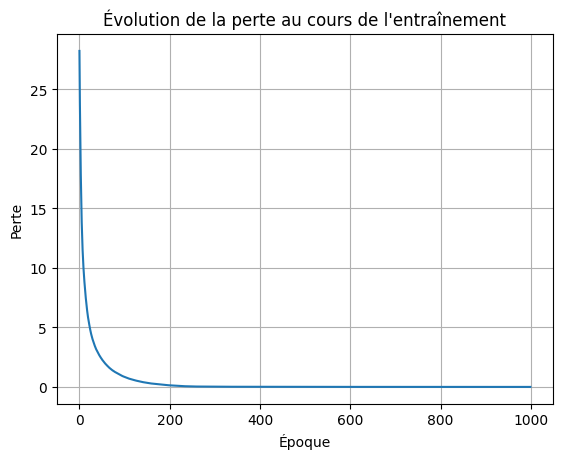

In [3]:
# Affichage de la perte
plot_loss(lloss)

Shape of y_hat_test: (30, 10)
First few entries of y_hat_test: [[  7.07717137 -19.18096273  -4.01294172 -12.68435189   3.62327554
   -1.04252406 -13.3682708   24.3733289  -12.52604755  10.7622532 ]
 [ -5.65051503   5.69712913   9.92417238  -7.29489265 -13.27536204
   -6.23153726 -22.50587408 -25.75167612  -6.4303521   -7.02149704]
 [  7.21080461  17.48017524 -15.38804533 -25.71703108 -14.36050356
  -11.96039721  -0.95211655  -4.49223679  -7.98748384  -7.52824557]
 [ 13.3884466   -2.40718661  10.98268332  -5.99784033 -31.1098205
  -19.44362077 -11.43717877  -8.98730714 -10.67914439  -0.27529116]
 [  9.45180226  -8.57560157   3.18741765  -4.18778528  29.7110953
   -7.42327978 -21.92242259  12.09800253   0.71748787 -19.29782624]]
Shape of y_test: (30, 10)
First few entries of y_test: [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
Shape of y_test_pred: (30,)
First few entr

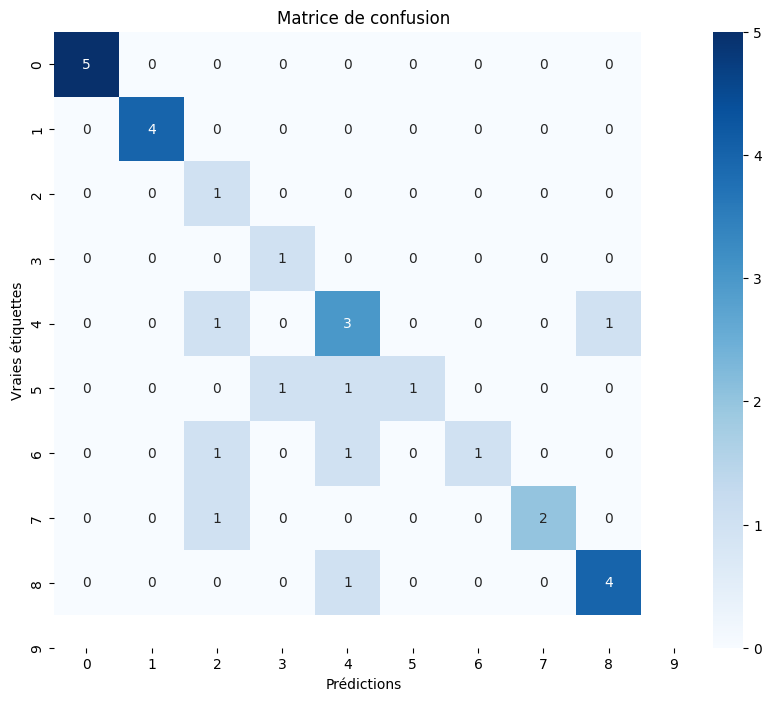

In [4]:

# Prédictions sur le jeu de test
y_hat_test = net.forward(X_test)[-1] 
print("Shape of y_hat_test:", y_hat_test.shape)  
print("First few entries of y_hat_test:", y_hat_test[:5])  

# Encodage one-hot de y_test
print("Shape of y_test:", y_test.shape)  
print("First few entries of y_test:", y_test[:5])  

# Calculer les prédictions
y_test_pred = np.argmax(y_hat_test, axis=1)
print("Shape of y_test_pred:", y_test_pred.shape)  
print("First few entries of y_test_pred:", y_test_pred[:5])  

plot_confusion_matrice(y_test, y_test_pred) # matrice de confusion

In [5]:
# exactitude sur le jeu de test
test_accuracy = calculate_accuracy(y_test, y_hat_test)
print(f'Exactitude sur le jeu de test: {test_accuracy * 100:.2f}%')

Exactitude sur le jeu de test: 73.33%
